In [2]:
import numpy as np 
import pandas as pd 
import cv2

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# dataset used: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset

In [5]:
# data augmentation
train_path = '/content/drive/MyDrive/mask_detection/dataset/Face Mask Dataset/Train'
# test_path = '/content/drive/MyDrive/mask_detection/dataset/Face Mask Dataset/Test'
val_path = '/content/drive/MyDrive/mask_detection/dataset/Face Mask Dataset/Validation'

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_path,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_path,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(128,128,3))
for layer in mobilenet.layers:
    layer.trainable = False
    
model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 2)                 40962     
                                                                 
Total params: 2,298,946
Trainable params: 40,962
Non-trainable params: 2,257,984
_________________________________________________________________


In [7]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")
history = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator)//32,epochs=5,validation_data=val_generator,validation_steps=len(val_generator)//32)

<ipython-input-7-28766309cf9f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator)//32,epochs=5,validation_data=val_generator,validation_steps=len(val_generator)//32)


Epoch 1/5
9/9 [==============================] - 161s 17s/step - loss: 0.5639 - accuracy: 0.8125
Epoch 2/5
9/9 [==============================] - 84s 9s/step - loss: 0.1672 - accuracy: 0.9757
Epoch 3/5
9/9 [==============================] - 78s 9s/step - loss: 0.1968 - accuracy: 0.9653
Epoch 4/5
9/9 [==============================] - 75s 8s/step - loss: 0.0150 - accuracy: 0.9931
Epoch 5/5
9/9 [==============================] - 80s 9s/step - loss: 0.0333 - accuracy: 0.9931


In [8]:
# from keras.models import load_model
# model = load_model('mask_detect.h5')

In [9]:
labels = {0:'MASK ON FACE',1:'NO MASK'}

In [10]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.9 MB/s eta 0:00:00


1/1 [==============================] - 0s 30ms/step


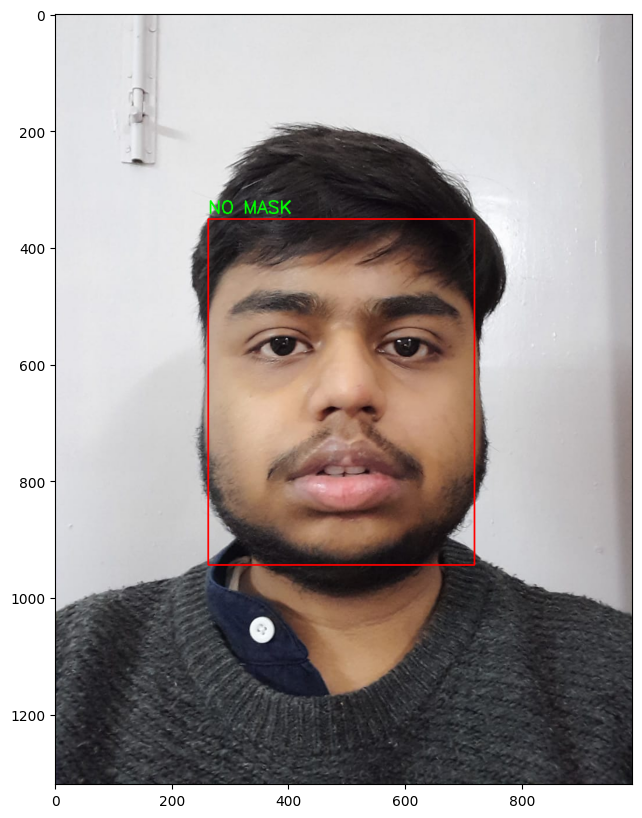

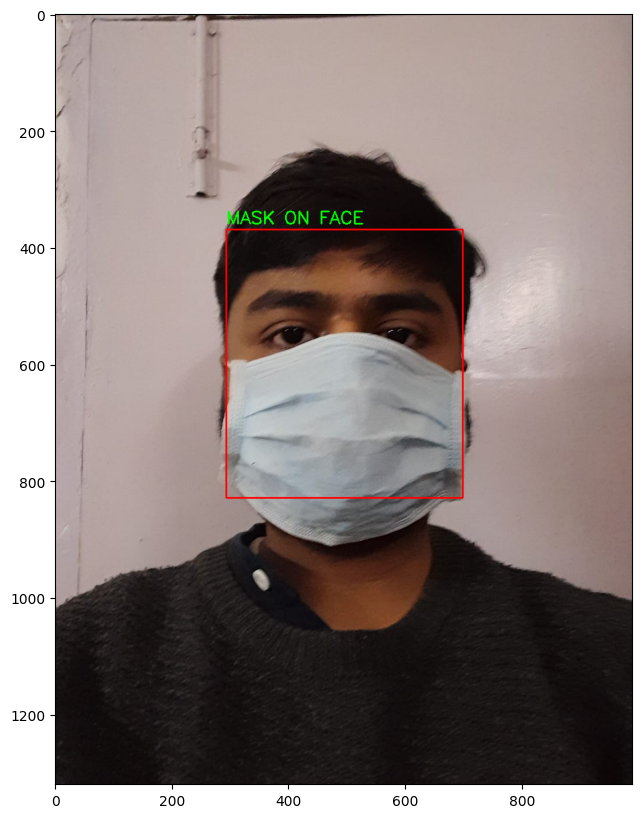

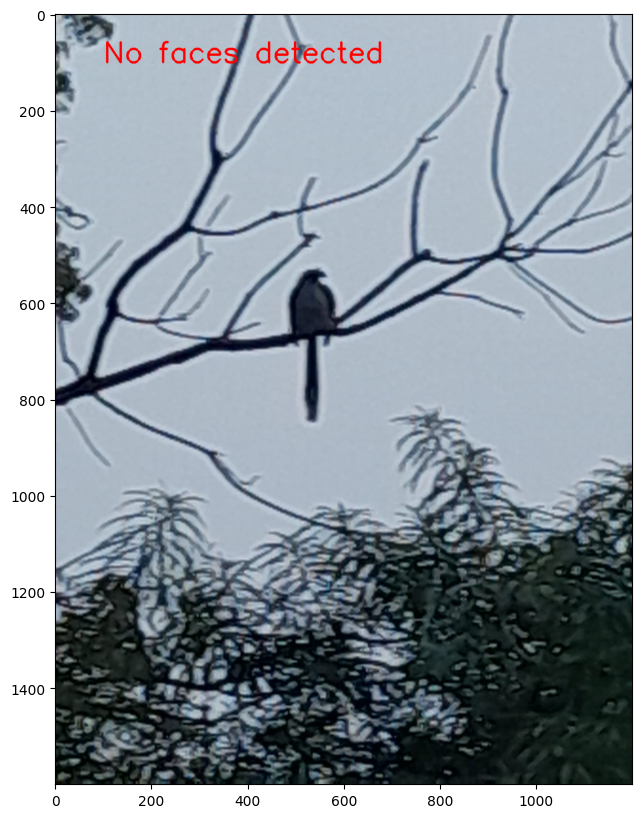

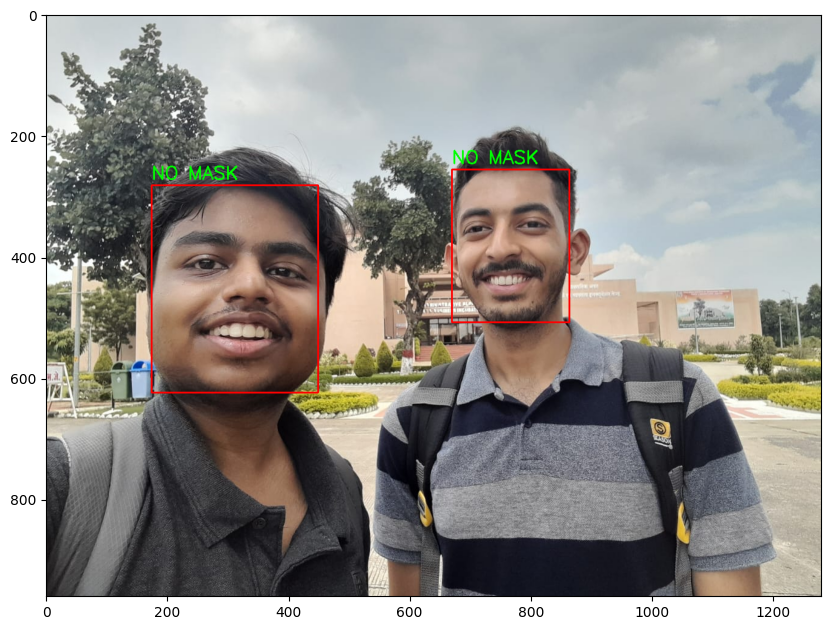

In [11]:
import cv2
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

detector = MTCNN()

test_img=['/content/drive/MyDrive/Mask_detection/suyashkhare.jpeg',
          '/content/drive/MyDrive/Mask_detection/suyash1.jpeg',
          '/content/drive/MyDrive/Mask_detection/check.jpeg',
          '/content/drive/MyDrive/Mask_detection/many.jpeg']

for input_img in test_img:
  
  img = cv2.imread(input_img)
  val = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  faces = detector.detect_faces(val) 

  if len(faces)>=1:
      new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 
      for i in range(len(faces)):
          (x,y,w,h) = faces[i]['box']
          
          face_data =  img[y : y+h, x : x+w]
          data = cv2.resize(face_data, (128,128))
          data = data / 255.
          data = data.reshape((1,) + data.shape)
          mask_result = model.predict(data)
          cv2.putText(new_img,labels[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
          cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),2)
      plt.figure(figsize=(10,10))
      plt.imshow(new_img)
              
  else:
      new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 
      cv2.putText(new_img,"No faces detected",(100, 100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),4)
      plt.figure(figsize=(10,10))
      plt.imshow(new_img)